https://github.com/gggggeun/My_study/blob/main/5.%20%EB%94%A5%EB%9F%AC%EB%8B%9D(deep%20learning)/practice/3.%20Reuters_dataset(%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98).ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), ( test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(train_data), len(test_data))

8982 2246


In [4]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
train_labels[10]

3

In [6]:
# keras를 이용한 방법
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

[과제]
- 모델 구성
- model compile
- 훈련 검증 : 1000개 샘플을 검증 세트로 사용
- 학습 : epochs = 20, batch_size=512
- 훈련과정 시각화
- 적합한 epoch 확인

모델구성

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 27ms/step - loss: 2.4376 - accuracy: 0.5395 - val_loss: 1.6439 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3736 - accuracy: 0.7068 - val_loss: 1.2848 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0396 - accuracy: 0.7682 - val_loss: 1.1083 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8161 - accuracy: 0.8240 - val_loss: 1.0184 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6456 - accuracy: 0.8643 - val_loss: 0.9720 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5128 - accuracy: 0.8941 - val_loss: 0.9442 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4114 - accuracy: 0.9144 - val_loss: 0.8830 - val_accuracy: 0.8130
Epoch 8/20
16

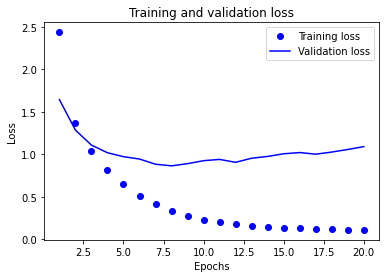

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(loss) +1 )

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

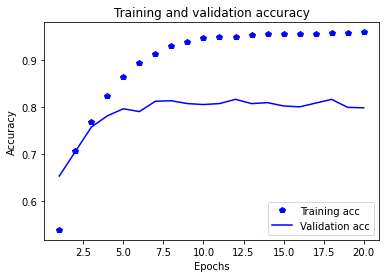

In [11]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bp', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

ephochs = 8 로 바꾸기

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=8,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/8
16/16 [==============================] - 1s 35ms/step - loss: 2.5764 - accuracy: 0.5291 - val_loss: 1.7198 - val_accuracy: 0.6460
Epoch 2/8
16/16 [==============================] - 0s 15ms/step - loss: 1.4256 - accuracy: 0.7041 - val_loss: 1.3713 - val_accuracy: 0.6820
Epoch 3/8
16/16 [==============================] - 0s 15ms/step - loss: 1.0638 - accuracy: 0.7751 - val_loss: 1.1684 - val_accuracy: 0.7420
Epoch 4/8
16/16 [==============================] - 0s 14ms/step - loss: 0.8352 - accuracy: 0.8279 - val_loss: 1.0558 - val_accuracy: 0.7880
Epoch 5/8
16/16 [==============================] - 0s 14ms/step - loss: 0.6626 - accuracy: 0.8657 - val_loss: 0.9958 - val_accuracy: 0.7980
Epoch 6/8
16/16 [==============================] - 0s 14ms/step - loss: 0.5285 - accuracy: 0.8934 - val_loss: 0.9391 - val_accuracy: 0.8100
Epoch 7/8
16/16 [==============================] - 0s 15ms/step - loss: 0.4212 - accuracy: 0.9151 - val_loss: 0.9171 - val_accuracy: 0.8140
Epoch 8/8
71/71 [===

[1.0579254627227783, 0.7684773206710815]

In [16]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [17]:
np.argmax(predictions[0])

4